# EDA for TSE 1st section dataset

In [2]:
# external modules
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.dates import DateFormatter
import seaborn as sns
import plotly.graph_objects as go
import statsmodels.api as sm

In [3]:
# Pandas setting
# Display 6 columns for viewing purposes
pd.set_option('display.max_columns', 50)

# Reduce decimal points to 2
pd.options.display.float_format = '{:,.2f}'.format

In [160]:
df = pd.read_csv("./../data/processed/tse1_multiindexed.csv", index_col=[0, 1, 2])

In [161]:
df

決算期  決算月数  連結基準フラグ  決算種別フラグ       決算発表日  \
企業名    決算期（年） 決算期（月）                                                
極洋     1999   9       1999/09     6     0.00    22.00         NaN   
       2000   3       2000/03    12     1.00    10.00  2000-05-18   
日本水産   1999   9       1999/09     6     0.00    22.00         NaN   
       2000   3       2000/03    12     1.00    10.00  2000-05-26   
マルハニチロ 1999   9       1999/09     6     0.00    22.00         NaN   
...                       ...   ...      ...      ...         ...   
グローセル  2021   3       2021/03    12     1.00    10.00  2021-05-14   
ベルーナ   2020   6       2020/06     3     1.00    21.00  2020-07-31   
              9       2020/09     6     1.00    22.00  2020-10-30   
              12      2020/12     9     1.00    23.00  2021-01-29   
       2021   3       2021/03    12     1.00    10.00  2021-05-13   

                     事業年度開始年月日［３ヵ月］   事業年度終了年月日  純資産合計／資本合計  当期純利益（連結）［累計］  \
企業名    決算期（年） 決算期（月）                                                         
極洋     1999   9                 NaN  1999-09-30         nan            nan   
       2000   3                 NaN  2000-03-31         nan            nan   
日本水産   1999   9                 NaN  1999-09-30         nan            nan   
       2000   3                 NaN  2000-03-31         nan            nan   
マルハニチロ 1999   9                 NaN  1999-09-30         nan            nan   
...                             ...         ...         ...            ...   
グローセル  2021   3          2021-01-01  2021-03-31   22,501.00        -367.00   
ベルーナ   2020   6          2020-04-01  2020-06-30  103,798.00       1,486.00   
              9          2020-07-01  2020-09-30  105,489.00       2,913.00   
              12         2020-10-01  2020-12-31  109,945.00       8,606.00   
       2021   3                 NaN  2021-03-31  113,231.00      11,019.00   

                      当期純利益（連結）［３ヵ月］    期中平均株式数［累計］  期中平均株式数［３ヵ月］  \
企業名    決算期（年） 決算期（月）                                                
極洋     1999   9                  nan 113,282,837.00           nan   
       2000   3                  nan 113,282,261.00           nan   
日本水産   1999   9                  nan 297,210,277.00           nan   
       2000   3                  nan 297,179,563.00           nan   
マルハニチロ 1999   9                  nan 300,000,000.00           nan   
...                              ...            ...           ...   
グローセル  2021   3                  nan  24,217,195.00           nan   
ベルーナ   2020   6             1,486.00  96,657,070.00 96,657,070.00   
              9                  nan  96,660,785.00           nan   
              12                 nan  96,664,827.00           nan   
       2021   3                  nan  96,666,782.00           nan   

                          期末発行済株式総数        自己株式数  １株当たり利益［累計］  １株当たり利益［３ヵ月］  \
企業名    決算期（年） 決算期（月）                                                          
極洋     1999   9      113,282,837.00       546.00         1.70           nan   
       2000   3      113,282,837.00       668.00         2.89           nan   
日本水産   1999   9      297,210,277.00     2,482.00         6.34           nan   
       2000   3      295,926,277.00     1,518.00        17.04           nan   
マルハニチロ 1999   9      300,000,000.00       452.00         4.51           nan   
...                             ...          ...          ...           ...   
グローセル  2021   3       26,426,800.00 2,097,045.00       -15.17           nan   
ベルーナ   2020   6       97,244,472.00   587,411.00        15.44         15.44   
              9       97,244,472.00   571,586.00        30.24         14.80   
              12      97,244,472.00   571,610.00        89.18         58.93   
       2021   3       97,244,472.00   571,852.00       114.17           nan   

                      １株当たり純資産  １株当たり配当金（各期末）  １株当たり配当金（累計）  配当金      棚卸資産  \
企業名    決算期（年） 決算期（月）                                                         
極洋     1999   9          80.74 

In [162]:
df.

決算期                                                        \
決算期（年）             1999     2000     2001     2002     2003     2004     2005   
企業名         決算期（月）                                                              
あい　ホールディングス 3       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
            6       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
            9       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
            12      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
あさひ         2       NaN  2000/02  2001/02  2002/02  2003/02  2004/02  2005/02   
...                 ...      ...      ...      ...      ...      ...      ...   
ｅｎｉｓｈ       12      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
ｇｕｍｉ        1       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
            4       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
            7       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
            10      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

                                                                          \
決算期（年）                 2006     2007     2008     2009     2010     2011   
企業名         決算期（月）                                                         
あい　ホールディングス 3           NaN      NaN  2008/03  2009/03  2010/03  2011/03   
            6           NaN  2007/06  2008/06  2009/06  2010/06  2011/06   
            9           NaN  2007/09  2008/09  2009/09  2010/09  2011/09   
            12          NaN  2007/12  2008/12  2009/12  2010/12  2011/12   
あさひ         2       2006/02  2007/02  2008/02  2009/02  2010/02  2011/02   
...                     ...      ...      ...      ...      ...      ...   
ｅｎｉｓｈ       12          NaN      NaN      NaN      NaN  2010/12  2011/12   
ｇｕｍｉ        1           NaN      NaN      NaN      NaN      NaN      NaN   
            4           NaN      NaN      NaN      NaN      NaN      NaN   
            7           NaN      NaN      NaN      NaN      NaN      NaN   
            10          NaN      NaN      NaN      NaN      NaN      NaN   

                                                                          \
決算期（年）                 2012     2013     2014     2015     2016     2017   
企業名         決算期（月）                                                         
あい　ホールディングス 3       2012/03  2013/03  2014/03  2015/03  2016/03  2017/03   
            6       2012/06  2013/06  2014/06  2015/06  2016/06  2017/06   
            9       2012/09  2013/09  2014/09  2015/09  2016/09  2017/09   
            12      2012/12  2013/12  2014/12  2015/12  2016/12  2017/12   
あさひ         2       2012/02  2013/02  2014/02  2015/02  2016/02  2017/02   
...                     ...      ...      ...      ...      ...      ...   
ｅｎｉｓｈ       12      2012/12  2013/12  2014/12  2015/12  2016/12  2017/12   
ｇｕｍｉ        1           NaN      NaN      NaN  2015/01  2016/01  2017/01   
            4           NaN  2013/04  2014/04  2015/04  2016/04  2017/04   
            7           NaN      NaN  2014/07  2015/07  2016/07  2017/07   
            10          NaN      NaN  2014/10  2015/10  2016/10  2017/10   

                                                       決算月数        ...  \
決算期（年）                 2018     2019     2020     2021 1999  2000  ...   
企業名         決算期（月）                                                 ...   
あい　ホールディングス 3       2018/03  2019/03  2020/03  2021/03  nan   nan  ...   
            6       2018/06  2019/06  2020/06      NaN  nan   nan  ...   
            9       2018/09  2019/09  2020/09      NaN  nan   nan  ...   
            12      2018/12  2019/12  2020/12      NaN  nan   nan  ...   
あさひ         2       2018/02  2019/02  2020/02  2021/02  nan 12.00  ...   
...                     ...      ...      ...      ...  ...   ...  ...   
ｅｎｉｓｈ       12      2018/12  2019/12  2020/12      NaN  nan   nan  ...   
ｇｕｍｉ        1  

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 143873 entries, ('極洋', 1999, 9) to ('ベルーナ', 2021, 3)
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   決算期                     143873 non-null  object 
 1   決算月数                    143873 non-null  int64  
 2   連結基準フラグ                 143797 non-null  float64
 3   決算種別フラグ                 143797 non-null  float64
 4   決算発表日                   139370 non-null  object 
 5   事業年度開始年月日［３ヵ月］          104293 non-null  object 
 6   事業年度終了年月日               143567 non-null  object 
 7   純資産合計／資本合計              111820 non-null  float64
 8   当期純利益（連結）［累計］           76638 non-null   float64
 9   当期純利益（連結）［３ヵ月］          25446 non-null   float64
 10  期中平均株式数［累計］             126866 non-null  float64
 11  期中平均株式数［３ヵ月］            37750 non-null   float64
 12  期末発行済株式総数               128692 non-null  float64
 13  自己株式数                   116206 non-null  float64


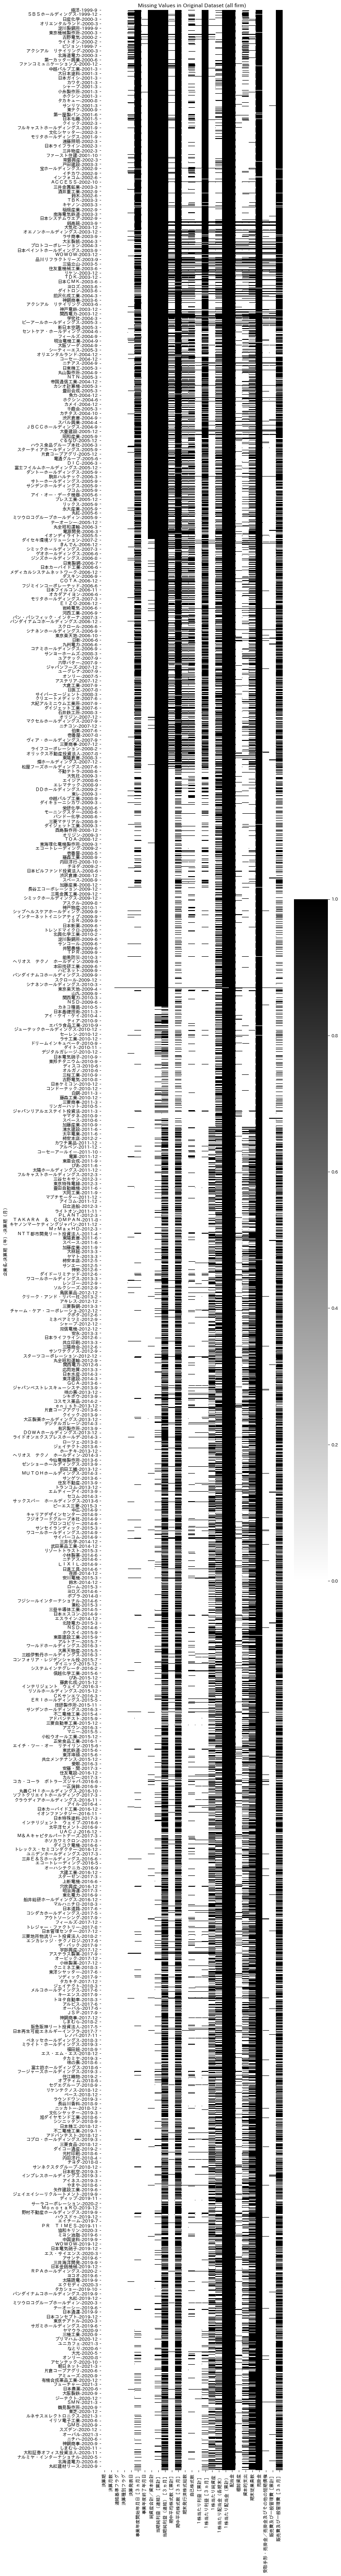

In [12]:
# Visualize
# Check Missing Value
fig, ax = plt.subplots(figsize=(9, 100))
ax = sns.heatmap(df.isna(), cmap="binary", linewidths=0, linecolor="gray")
ax.set_title("Missing Values in Original Dataset (all firm)")
plt.show()

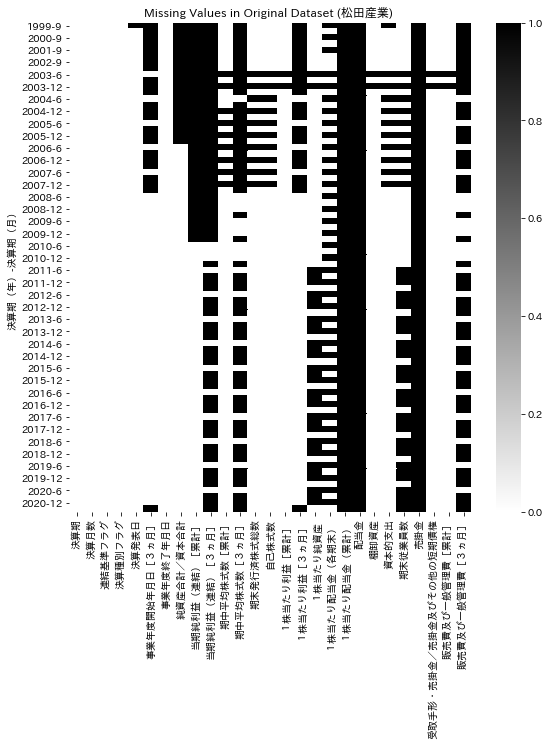

In [16]:
# Check Missing Value for a firm
f = df.index.get_level_values("企業名").unique()[1000]
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(df.loc[f].isna(), cmap="binary", linewidths=0, linecolor="gray")
ax.set_title("Missing Values in Original Dataset" + " (" + f + ") ")
plt.show()

In [5]:
firm_name_list = df.index.get_level_values("企業名").unique()

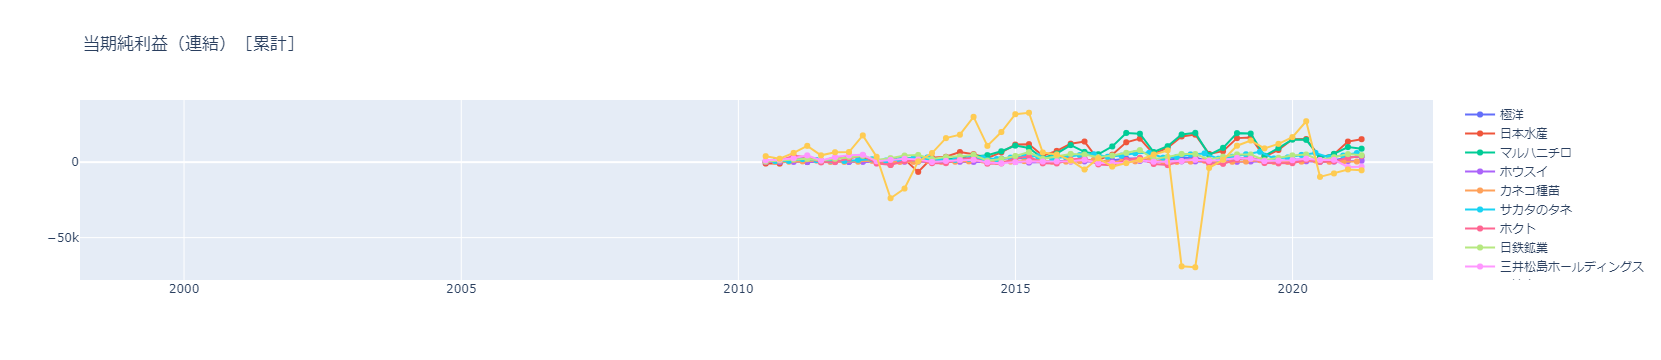

In [25]:
# plot time series plotly graphical object
# https://plotly.com/python/time-series/
# https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series

# plot Net Income

fig = go.Figure()

for f in firm_name_list[ :10]:
    fig.add_trace(go.Scatter(
        name=f,
        mode="markers+lines",
        x=df.loc[f]["事業年度終了年月日"], #["決算期"], 
        y=df.loc[f]["当期純利益（連結）［累計］"]
    ))

fig.update_layout(title_text="当期純利益（連結）［累計］")

fig.show()

会計期間開始月が違うのがある。3月決算に企業に絞るか?
うまくやったら絞る必要はないか?

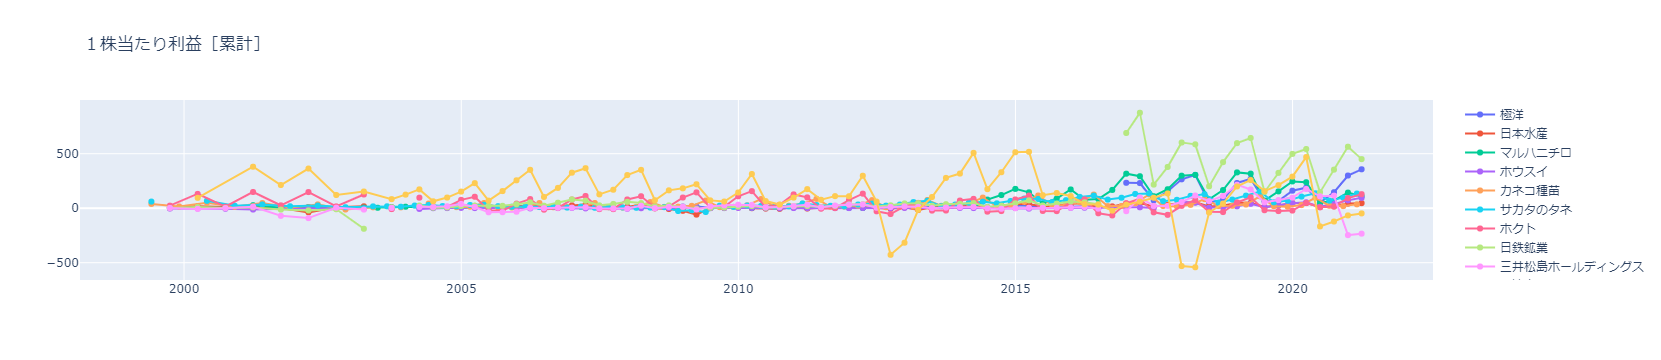

In [26]:
# plot EPS
fig = go.Figure()
for f in firm_name_list[ :10]:
    fig.add_trace(go.Scatter(
        name=f,
        mode="markers+lines",
        x=df.loc[f]["事業年度終了年月日"], #["決算期"], 
        y=df.loc[f]["１株当たり利益［累計］"]
    ))

fig.update_layout(title_text="１株当たり利益［累計］")

fig.show()

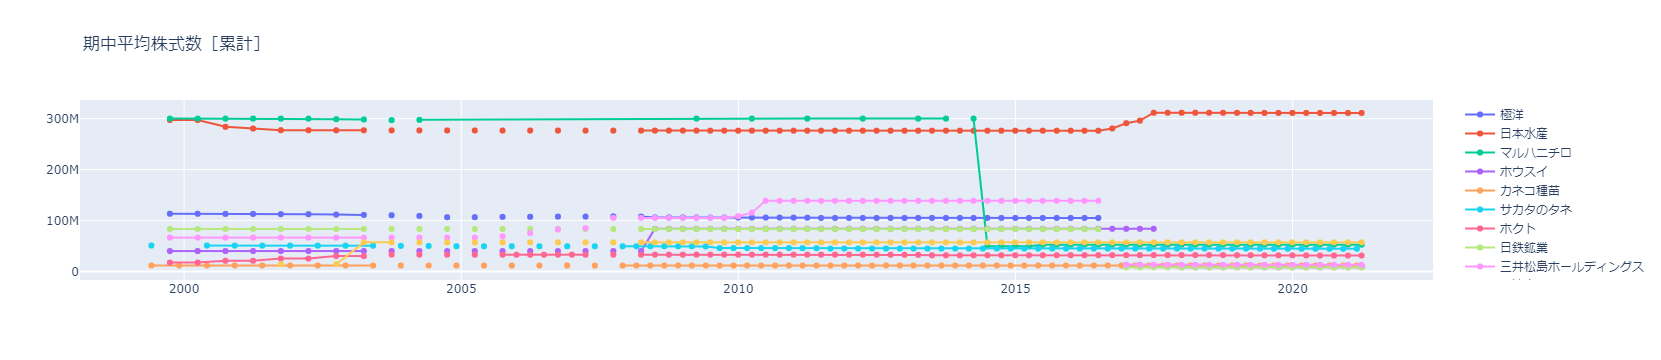

In [27]:
# plot num stock released
fig = go.Figure()
for f in firm_name_list[ :10]:
    fig.add_trace(go.Scatter(
        name=f,
        mode="markers+lines",
        x=df.loc[f]["事業年度終了年月日"], #["決算期"], 
        y=df.loc[f]["期中平均株式数［累計］"]
    ))

fig.update_layout(title_text="期中平均株式数［累計］")

fig.show()

1株当たり利益 * 期中平均発行済株式数 = 当期純利益 で当期純利益を逆算できる。-->一致するかチェック

レコード期間は企業によって異なる。どうするべきか? --> 先行研究チェック

(88, 2120)


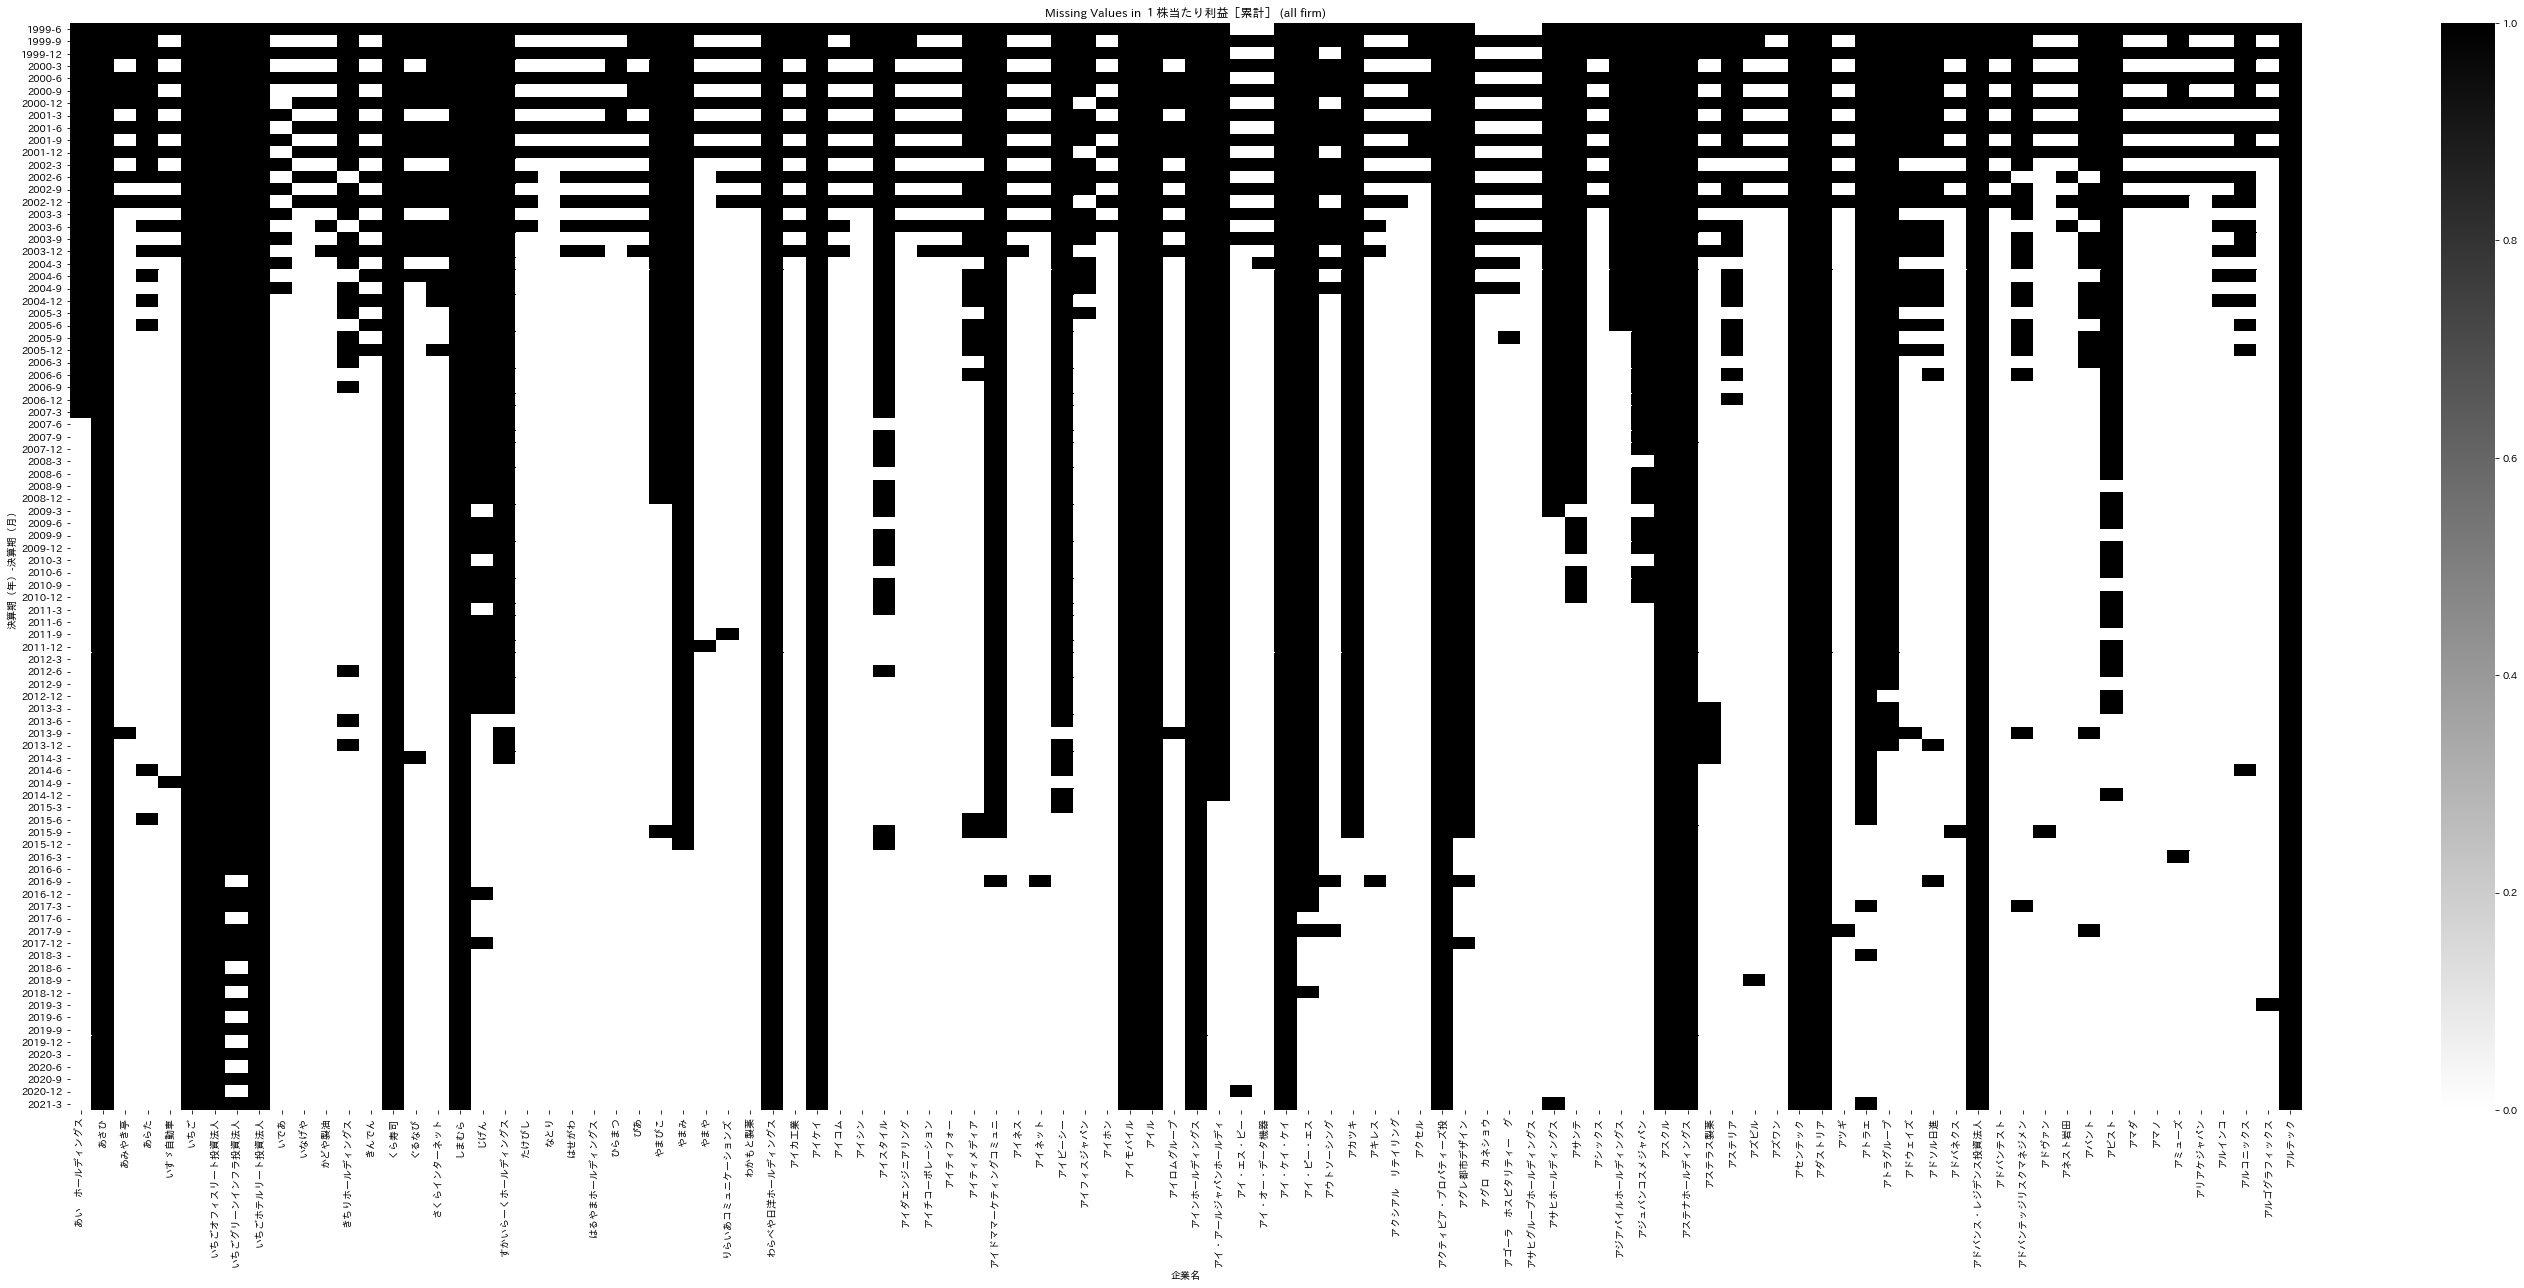

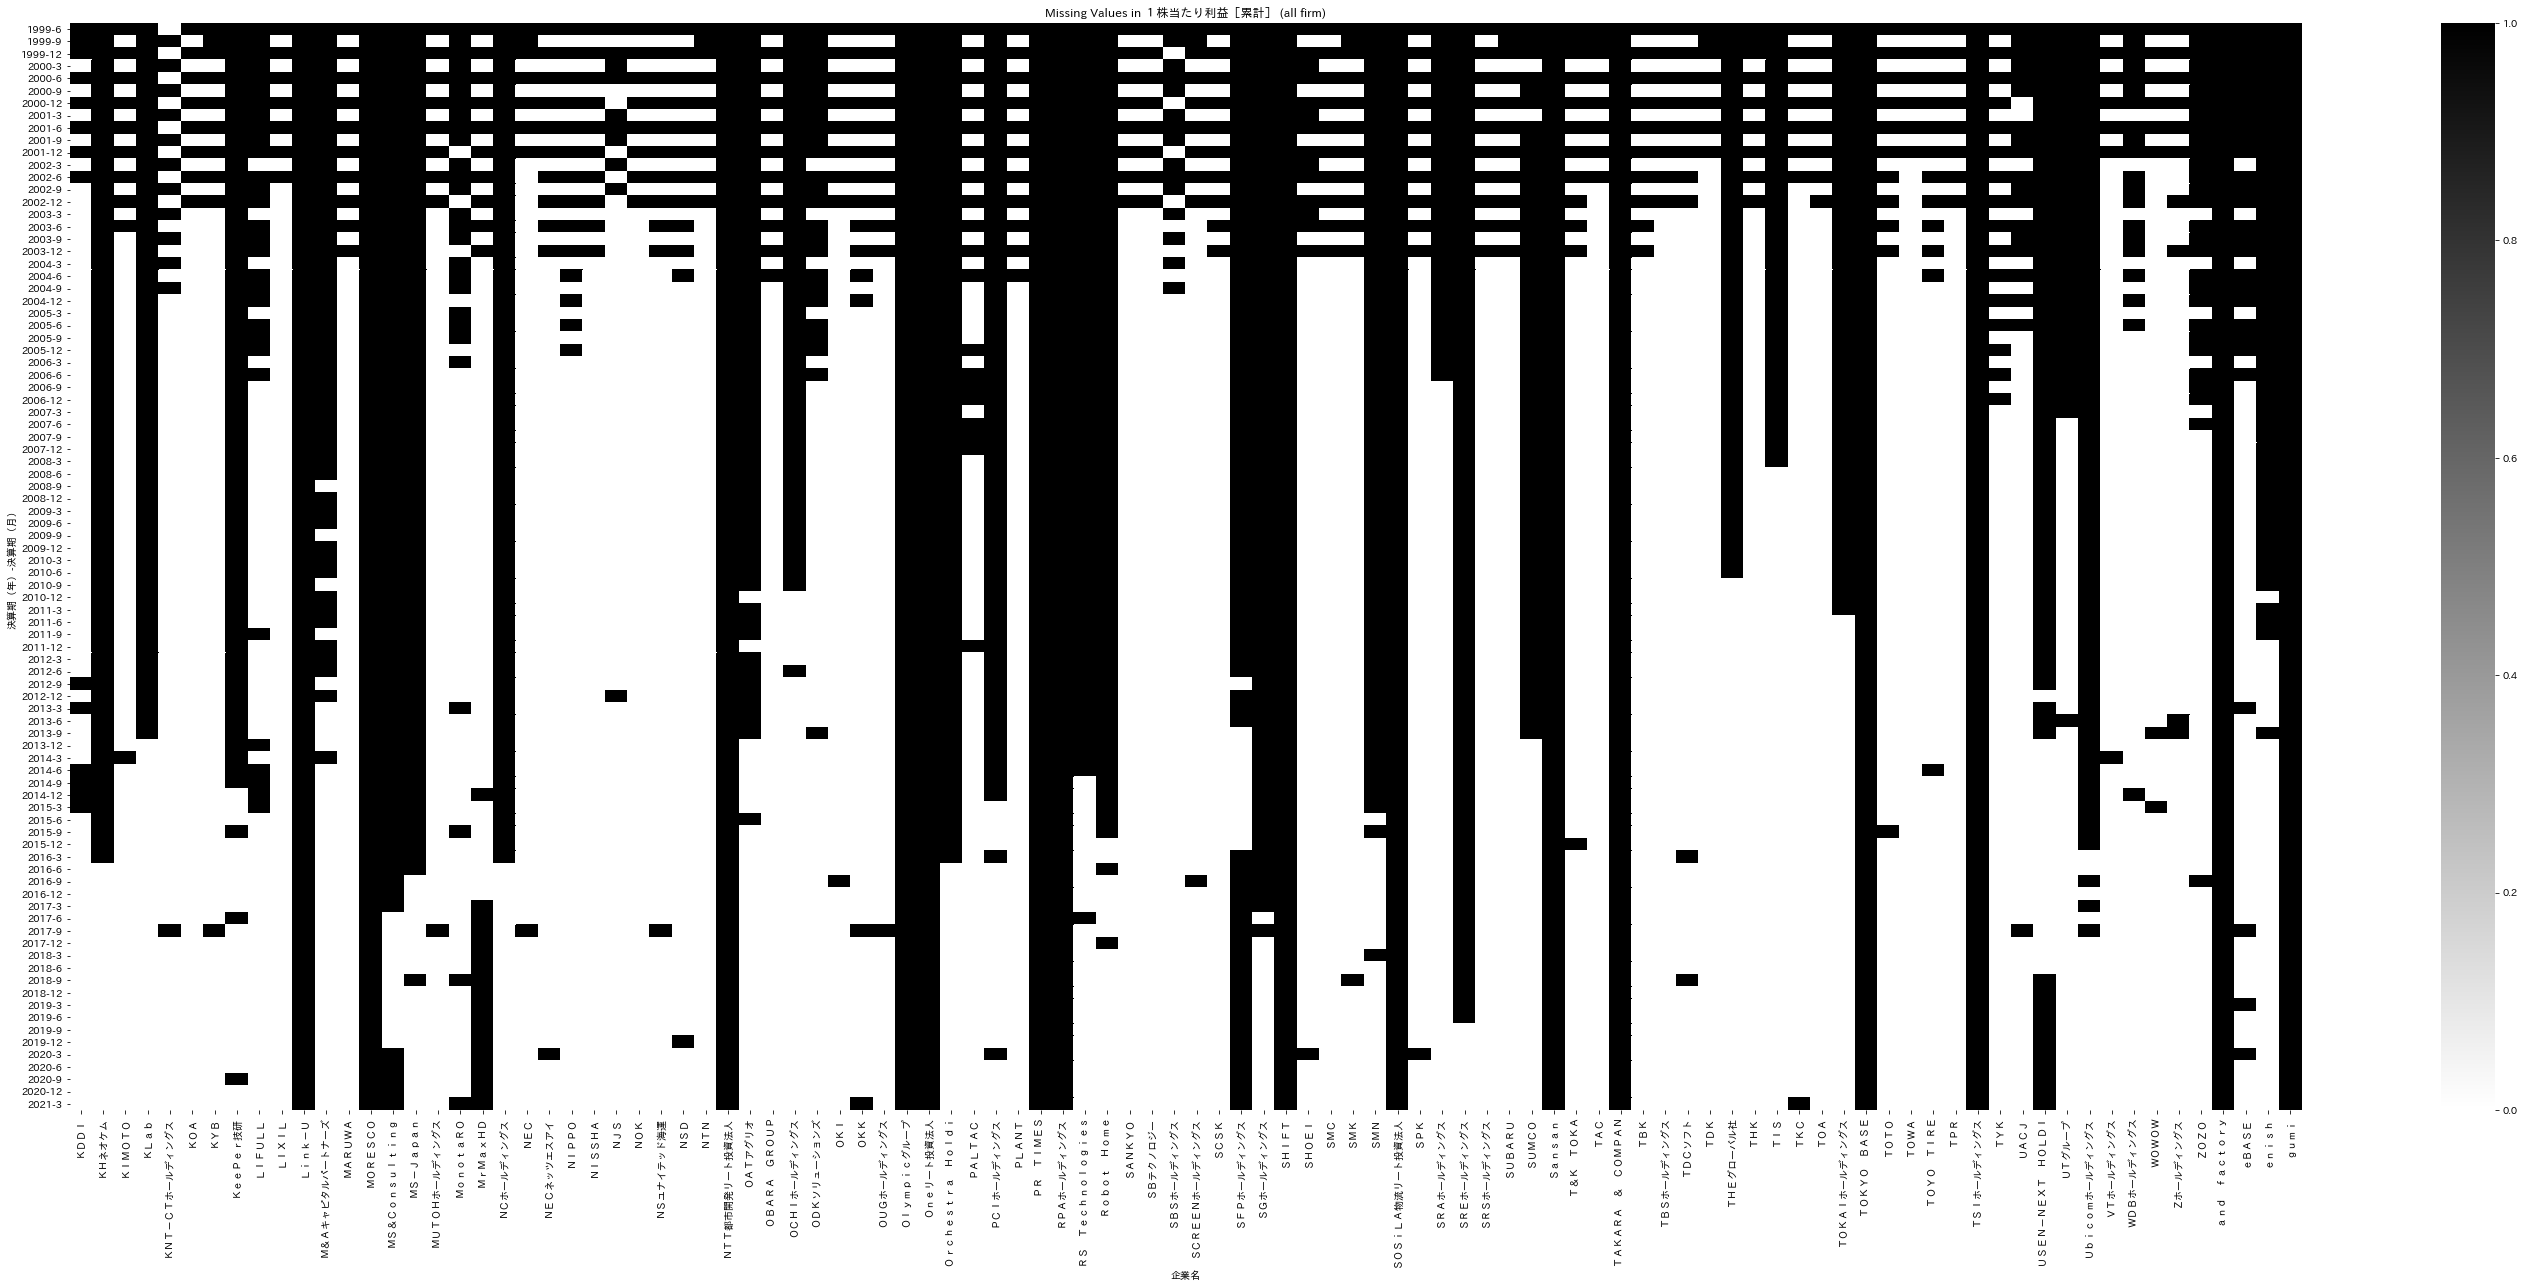

In [250]:
# unstack "企業名" index and extract only {Mar, Jun, Sep, Dec}
# とりあえず3, 6, 9, 12ではない企業は排除?
eps = df["１株当たり利益［累計］"].unstack(level=0).loc[pd.IndexSlice[:, [3, 6, 9, 12], :], :]
print(d.shape)

fig, ax = plt.subplots(figsize=(50, 20))
ax = sns.heatmap(eps.iloc[:, :100].isna(), cmap="binary", linewidths=0, linecolor="gray")
ax.set_title("Missing Values in １株当たり利益［累計］ (all firm)")
plt.show()

fig, ax = plt.subplots(figsize=(50, 20))
ax = sns.heatmap(eps.iloc[:, -100:].isna(), cmap="binary", linewidths=0, linecolor="gray")
ax.set_title("Missing Values in １株当たり利益［累計］ (all firm)")
plt.show()

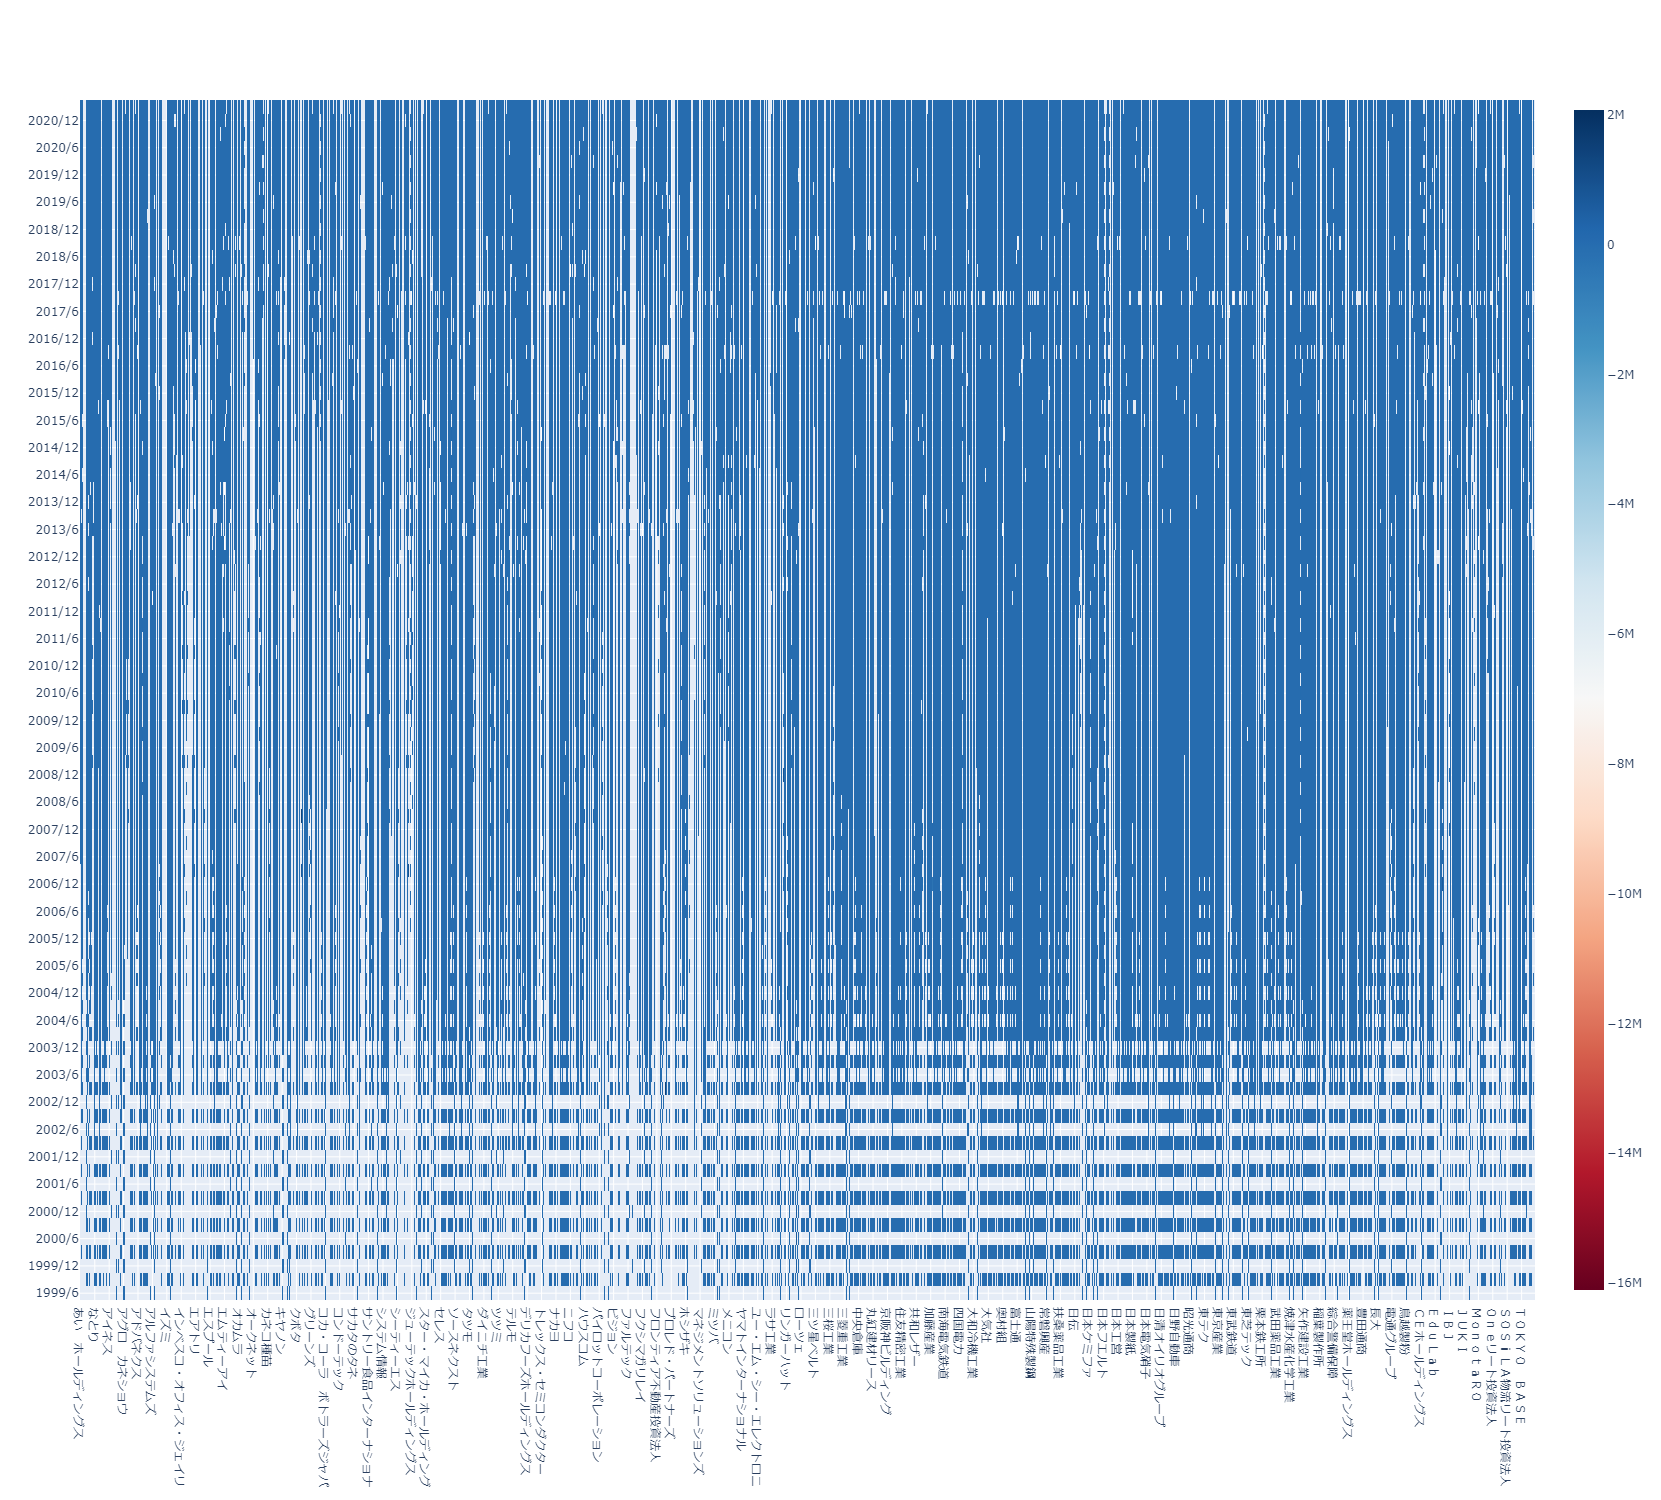

In [267]:
plot_data = eps

fig = go.Figure()

fig.add_trace(go.Heatmap(
    x=plot_data.columns.values,
    y=pd.Series(plot_data.index.values).apply(lambda x: str(x[0]) + "/" + str(x[1])).values,
    z=plot_data.values,
    colorscale='RdBu',
))

fig.update_layout(
    width=1500,
    height=1500
)

fig.show()

## Data Preprocessing

データの定常化

分散の安定化
* 自然対数変換(非負) https://www.researchgate.net/post/How_to_preprocess_Time_series_data
* 正規化